# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [2]:
def u(z,vartheta= -2):
    return (z**(1+vartheta))/(1+vartheta)
def V0(x,y=1,p=0.2):
    return p* u(y-x)+(1-p)*u(y)
def pi(q,p=0.2):
    return p*q
def V(q,x,y=1,p=0.2):
    return p* u(y-x+q-pi(q,p)) + (1-p)*u(y-pi(q,p))
def V2(q,pi,x=0.6,y=1,p=0.2):
    return p* u(y-x+q-pi) + (1-p)*u(y-pi)


In [3]:
u(0.4)

-2.5

In [14]:

def solve(x,y=1,p=0.2):
    obj = lambda q: -V(q,x) 
    x0 = x/2   #initial guess
    sol_case = optimize.minimize_scalar(
                obj,x0,method='bounded',
                bounds=(0,x))
    if sol_case.success == False:
        print(sol_case.message)
    return sol_case.x

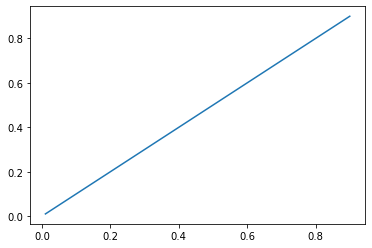

In [15]:
v_vec = []
x_vec = []
qs_vec = []        
for i in np.linspace(0.01, 0.9, num=50):
    q_star = solve(i)
    x_vec.append(i)
    qs_vec.append(q_star)
    v_vec.append(V(q_star,i))
plt.plot(x_vec,qs_vec);
#plt.plot(x_vec,v_vec);

# Question 2

Explain your code and procedure

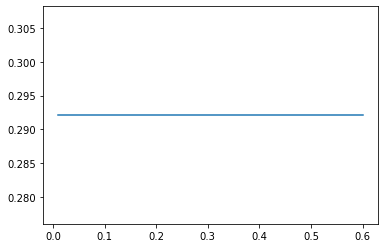

In [10]:
def objective(q,x=0.6,y=1,p=0.2):
    return V2(q,x,y,p) -V0(x,y,p)
x= 0.6
pitilde_vec = []
q_vec = []
V_vec = []
count= 0
for i in np.linspace(0.01, x, num=50):
    x0= 1
    sol = optimize.broyden1(objective, x0)
    
    pitilde_vec.append(pi(0.2,sol))
    V_vec.append(V(sol,x=i,y=1,p=0.2))
    q_vec.append(i)
plt.plot(q_vec,pitilde_vec)
#plt.plot(q_vec,V_vec);

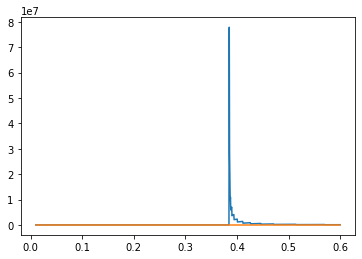

In [22]:
def objective(q,pi,x=0.6,y=1,p=0.2):
    return V2(q,pi,x,y,p) -V0(x,y,p)
x= 0.6
pitilde_vec = []
q_vec = []
V_vec = []
count= 0
for i in np.linspace(0.01, x, num=1000):
    x0= 1
    #sol = optimize.broyden1(objective(q,i), x0)
    sol = optimize.root(objective, x0, args=(i)) 

    pitilde_vec.append(pi(sol.x,0.2))
    V_vec.append(-V2(sol.x,i,x=0.6,y=1,p=0.2))
    q_vec.append(i)
plt.plot(q_vec,pitilde_vec)
plt.plot(q_vec,V_vec);

# Question 3

Explain your code and procedure

In [7]:
# code

ADD CONCISE CONLUSION.